In [1]:
from pandas import read_csv
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# Data : Company_data

## Importing the dataset

In [2]:
company =  pd.read_csv("/content/Company_Data.csv")
company

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

## About the data: 

#### Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 

> Sales -- Unit sales (in thousands) at each location

>Competitor Price -- Price charged by competitor at each location

>Income -- Community income level (in thousands of dollars)

>Advertising -- Local advertising budget for company at each location (in thousands of dollars)

>Population -- Population size in region (in thousands)

>Price -- Price company charges for car seats at each site

> Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

>Age -- Average age of the local population

>Education -- Education level at each location

>Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

>US -- A factor with levels No and Yes to indicate whether the store is in the US or not

 
#### Problem Statement:

A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


## Basic analysis and descriptives of the data

In [3]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
company.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

## Correlation plot

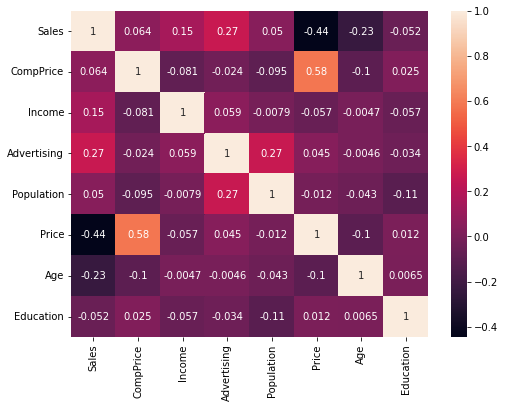

In [5]:
plt.figure(figsize=(8,6))
sns.heatmap(company.corr(), annot=True)

## Decoding the dependent variable

In [6]:
data_c = company.copy()

In [7]:
q0 = 0-0.00005
q2 = company["Sales"].quantile(.5)
q4 = company["Sales"].quantile(1)

In [8]:
company['Sales_c'] = pd.cut(company.Sales,
                     bins=[q0, q2, q4],
                     labels=["Low Sales","High Sales"])
company

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US     Sales_c  
0           17   Yes  Yes  High Sales  
1           10   Yes  Yes  High Sales  
2           12   Yes  Yes  High Sales  
3           14   Yes  Yes   Low Sales  
4           13   Yes   No   Low Sales  
..         ...   ...  ...         ...  
395         14   Yes  Yes  High Sales  
396         11    No  Yes   Low Sales  
397         18   Yes  Yes   Low Sales  
398         12   Yes  Yes   Low Sales  
399         16   Yes  Yes  High Sales  

[400 rows x 12 columns]

In [9]:
company = company.drop(["Sales"],axis=1)

In [10]:
company

CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0          138      73           11         276    120       Bad   42   
1          111      48           16         260     83      Good   65   
2          113      35           10         269     80    Medium   59   
3          117     100            4         466     97    Medium   55   
4          141      64            3         340    128       Bad   38   
..         ...     ...          ...         ...    ...       ...  ...   
395        138     108           17         203    128      Good   33   
396        139      23            3          37    120    Medium   55   
397        162      26           12         368    159    Medium   40   
398        100      79            7         284     95       Bad   50   
399        134      37            0          27    120      Good   49   

     Education Urban   US     Sales_c  
0           17   Yes  Yes  High Sales  
1           10   Yes  Yes  High Sales  
2           12   Yes  Yes  High Sales  
3           14   Yes  Yes   Low Sales  
4           13   Yes   No   Low Sales  
..         ...   ...  ...         ...  
395         14   Yes  Yes  High Sales  
396         11    No  Yes   Low Sales  
397         18   Yes  Yes   Low Sales  
398         12   Yes  Yes   Low Sales  
399         16   Yes  Yes  High Sales  

[400 rows x 11 columns]

In [11]:
company['Sales_c']=company['Sales_c'].map({'High Sales':1,'Low Sales':2})

In [12]:
company

CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0          138      73           11         276    120       Bad   42   
1          111      48           16         260     83      Good   65   
2          113      35           10         269     80    Medium   59   
3          117     100            4         466     97    Medium   55   
4          141      64            3         340    128       Bad   38   
..         ...     ...          ...         ...    ...       ...  ...   
395        138     108           17         203    128      Good   33   
396        139      23            3          37    120    Medium   55   
397        162      26           12         368    159    Medium   40   
398        100      79            7         284     95       Bad   50   
399        134      37            0          27    120      Good   49   

     Education Urban   US Sales_c  
0           17   Yes  Yes       1  
1           10   Yes  Yes       1  
2           12   Yes  Yes       1  
3           14   Yes  Yes       2  
4           13   Yes   No       2  
..         ...   ...  ...     ...  
395         14   Yes  Yes       1  
396         11    No  Yes       2  
397         18   Yes  Yes       2  
398         12   Yes  Yes       2  
399         16   Yes  Yes       1  

[400 rows x 11 columns]

In [13]:
company["Sales_c"].value_counts()

2    201
1    199
Name: Sales_c, dtype: int64

## Encoding the independent variables

In [14]:
data_company=pd.get_dummies(company,columns=['ShelveLoc','US','Urban'])
data_company

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

    Sales_c  ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  US_No  US_Yes  \
0         1              1               0                 0      0       1   
1         1              0               1                 0      0       1   
2         1              0               0                 1      0       1   
3         2              0               0                 1      0       1   
4         2              1               0                 0      1       0   
..      ...            ...             ...               ...    ...     ...   
395       1              0               1                 0      0       1   
396       2              0               0                 1      0       1   
397       2              0               0                 1      0       1   
398       2              1               0                 0      0       1   
399       1              0               1                 0      0       1   

     Urban_No  Urban_Yes  
0           0          1  
1           0          1  
2           0          1  
3           0          1  
4           0          1  
..        ...        ...  
395         0          1  
396         1          0  
397         0          1  
398         0          1  
399         0          1  

[400 rows x 15 columns]

## Scaling the data

In [15]:
scaler = MinMaxScaler()
scaled_data2=pd.DataFrame(scaler.fit_transform(data_company),columns=data_company.columns, index=data_company.index)
scaled_data2

CompPrice    Income  Advertising  Population     Price       Age  \
0     0.622449  0.525253     0.379310    0.533066  0.574850  0.309091   
1     0.346939  0.272727     0.551724    0.501002  0.353293  0.727273   
2     0.367347  0.141414     0.344828    0.519038  0.335329  0.618182   
3     0.408163  0.797980     0.137931    0.913828  0.437126  0.545455   
4     0.653061  0.434343     0.103448    0.661323  0.622754  0.236364   
..         ...       ...          ...         ...       ...       ...   
395   0.622449  0.878788     0.586207    0.386774  0.622754  0.145455   
396   0.632653  0.020202     0.103448    0.054108  0.574850  0.545455   
397   0.867347  0.050505     0.413793    0.717435  0.808383  0.272727   
398   0.234694  0.585859     0.241379    0.549098  0.425150  0.454545   
399   0.581633  0.161616     0.000000    0.034068  0.574850  0.436364   

     Education  Sales_c  ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  \
0        0.875      0.0            1.0             0.0               0.0   
1        0.000      0.0            0.0             1.0               0.0   
2        0.250      0.0            0.0             0.0               1.0   
3        0.500      1.0            0.0             0.0               1.0   
4        0.375      1.0            1.0             0.0               0.0   
..         ...      ...            ...             ...               ...   
395      0.500      0.0            0.0             1.0               0.0   
396      0.125      1.0            0.0             0.0               1.0   
397      1.000      1.0            0.0             0.0               1.0   
398      0.250      1.0            1.0             0.0               0.0   
399      0.750      0.0            0.0             1.0               0.0   

     US_No  US_Yes  Urban_No  Urban_Yes  
0      0.0     1.0       0.0        1.0  
1      0.0     1.0       0.0        1.0  
2      0.0     1.0       0.0        1.0  
3      0.0     1.0       0.0        1.0  
4      1.0     0.0       0.0        1.0  
..     ...     ...       ...        ...  
395    0.0     1.0       0.0        1.0  
396    0.0     1.0       1.0        0.0  
397    0.0     1.0       0.0        1.0  
398    0.0     1.0       0.0        1.0  
399    0.0     1.0       0.0        1.0  

[400 rows x 15 columns]

In [16]:
X=scaled_data2.drop(['Sales_c'], axis=1)
Y=scaled_data2["Sales_c"]

In [17]:
Columns=X.columns

## Splitting the data using train test split.

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

## Deciding the best parameter

We shall decide the best parameter using visualization

In [19]:
for x in range(2,20,1): # range for n_estimators
    acc = []
    for i in range(2,20,1): # range for max_depth
        model = RandomForestClassifier(bootstrap=True,n_estimators = x ,max_depth=i , random_state = 42)
        model.fit(X_train, Y_train)
        train=model.score(X_train, Y_train)
        test=model.score(X_test, Y_test)
        acc.append([train, test])
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=np.arange(2,20,1), y=[i[0] for i in acc],
                    mode='lines+markers',
                    name='Training'))
    fig.add_trace(go.Scatter(x=np.arange(2,20,1), y=[i[1] for i in acc],
                    mode='lines+markers',
                    name='Testing'))
    fig.update_layout(title=x,
                   xaxis_title='Max-depth',
                   yaxis_title='Accuracy')
    fig.show()

Seeing to the graphs, we can say that the max-depth of 3, with the n_estimators as 8, seems to be the most ideal one, as at this values we are able to achieve the optimum accuracy with less gap between the training and testing accuracy so as to keep the overfitting under control.

## Model Building

In [20]:
model = RandomForestClassifier(bootstrap=True,n_estimators = 8 ,max_depth=3 , random_state = 42)
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=3, n_estimators=8, random_state=42)

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1608637542)


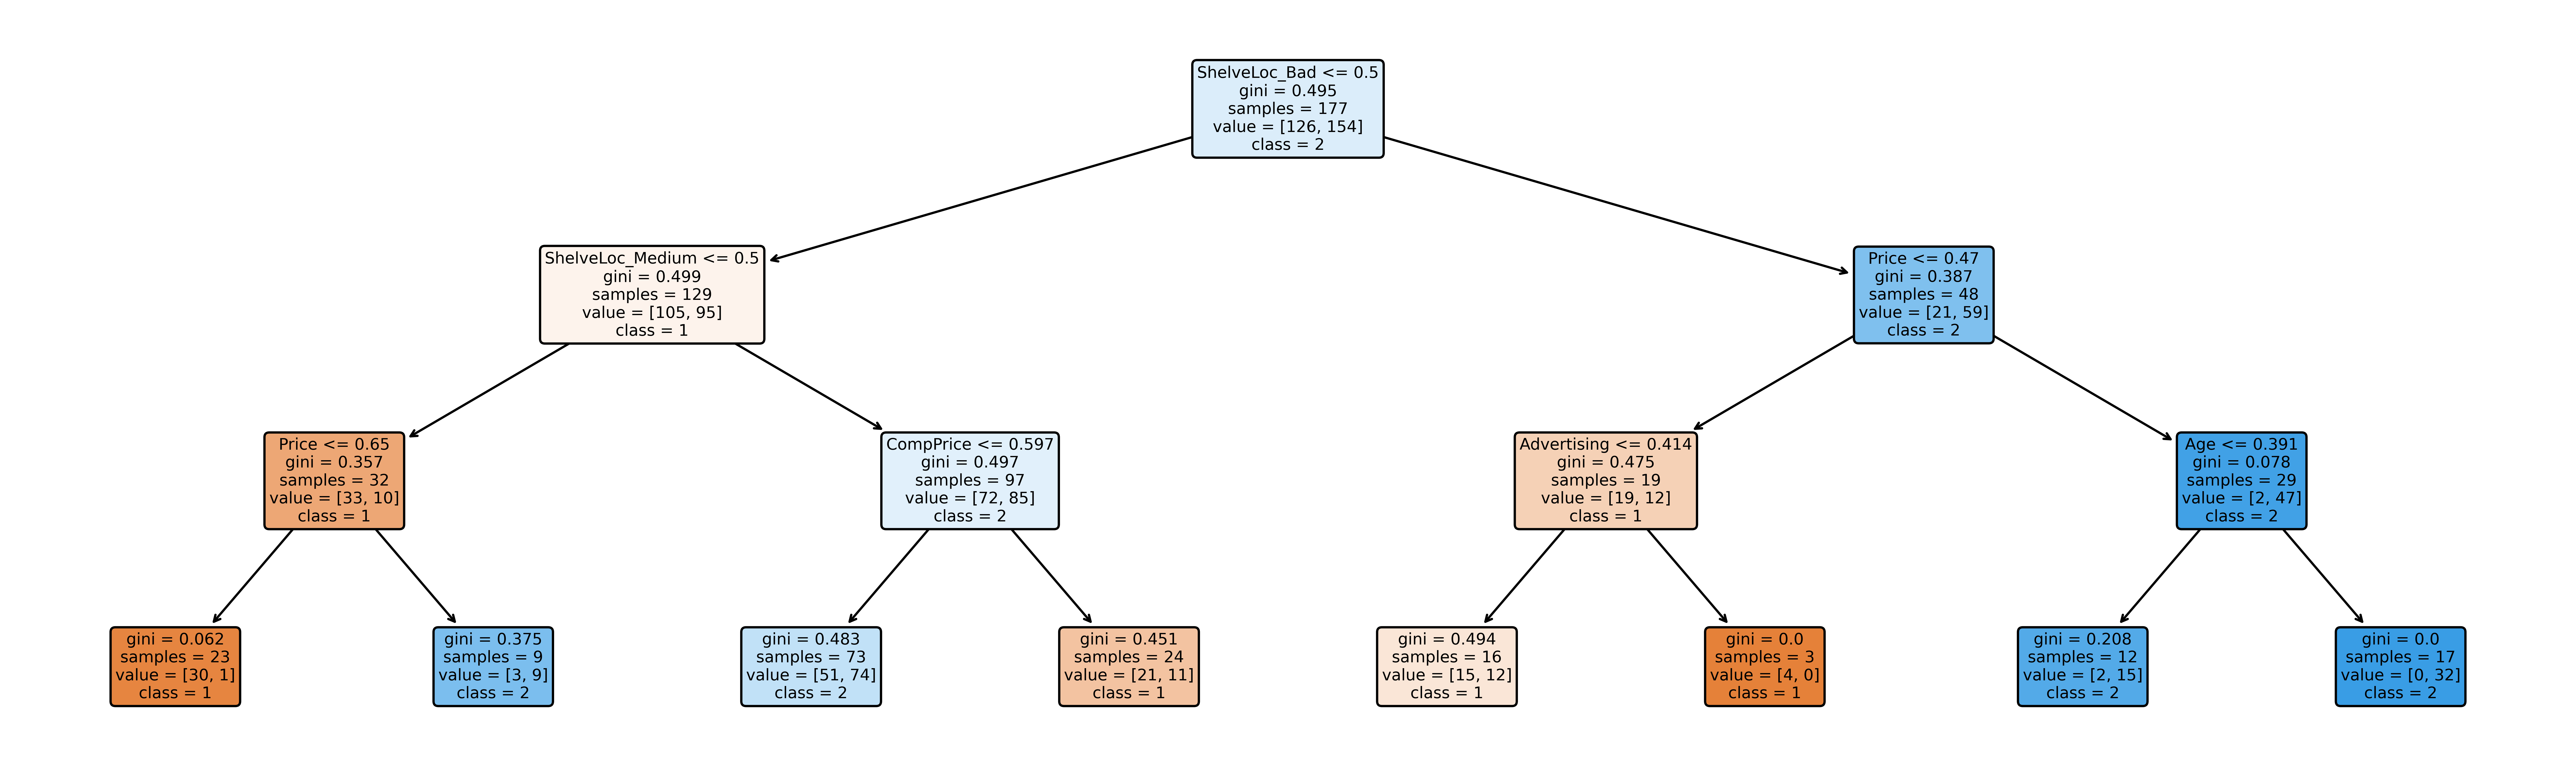

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1273642419)


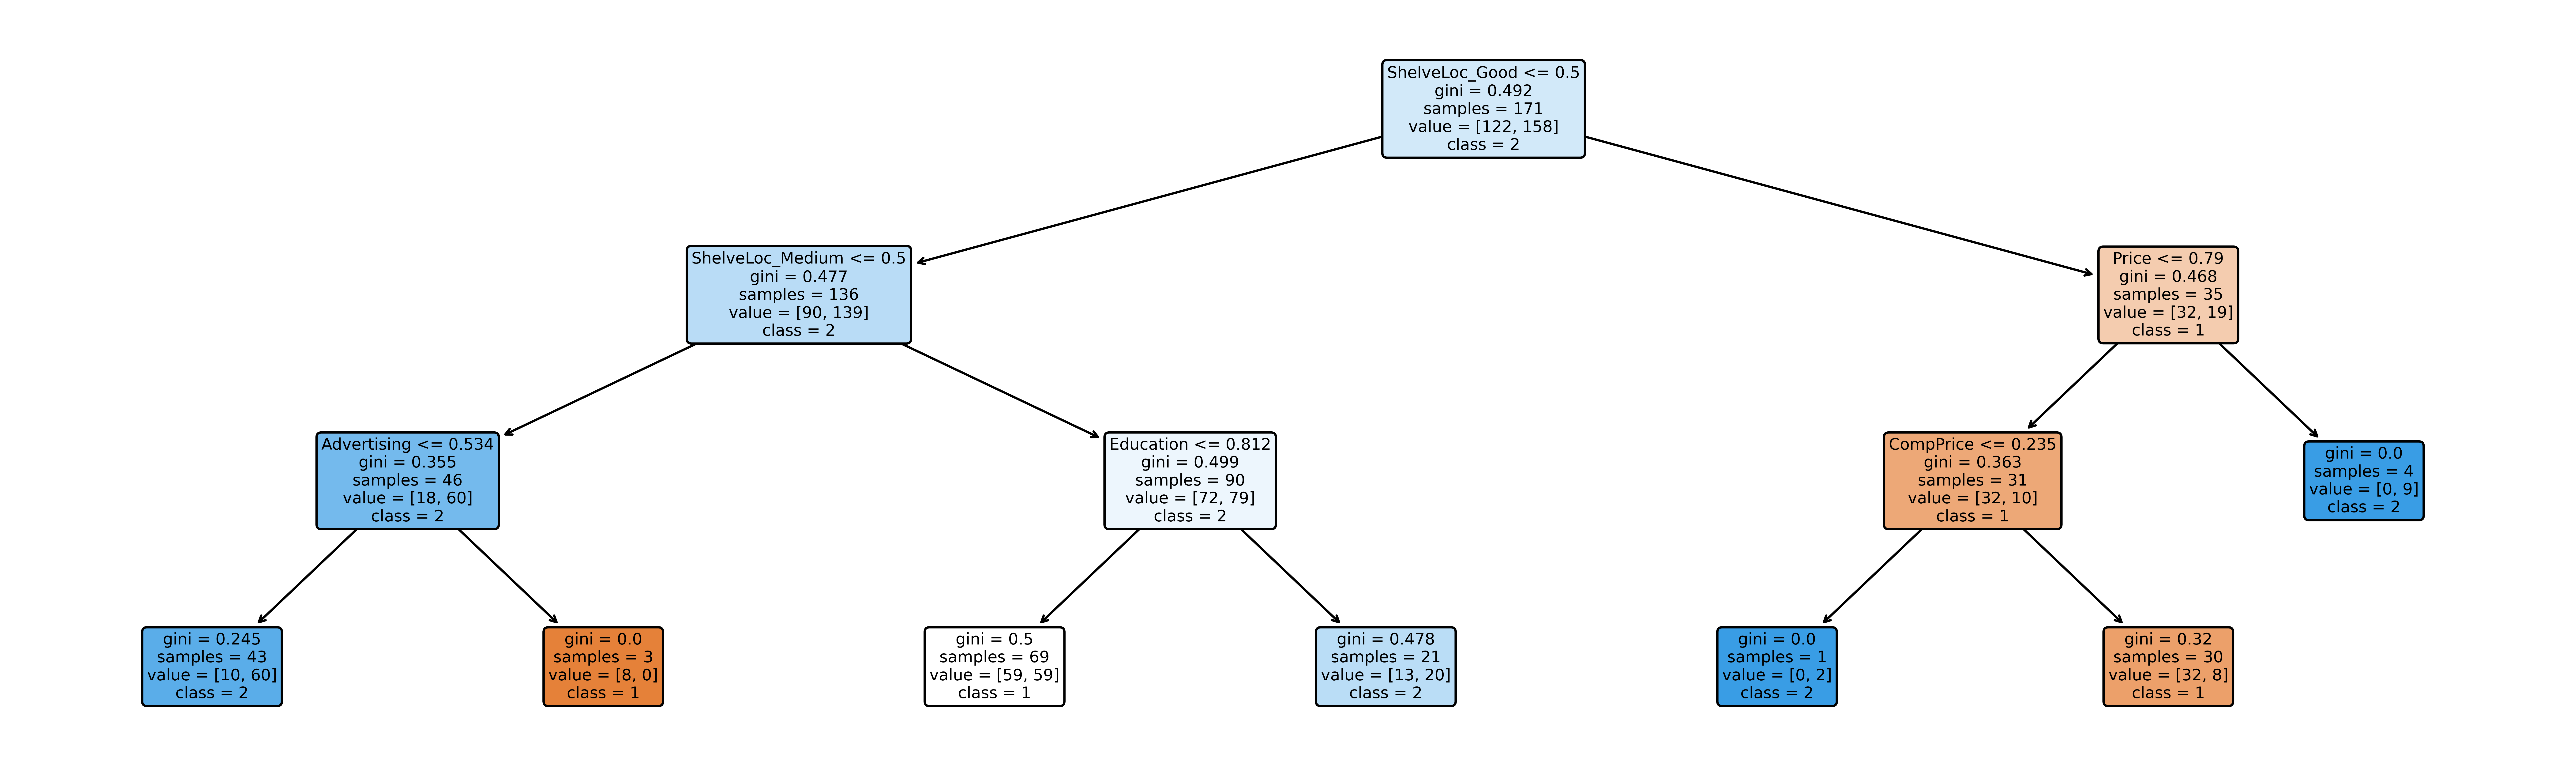

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1935803228)


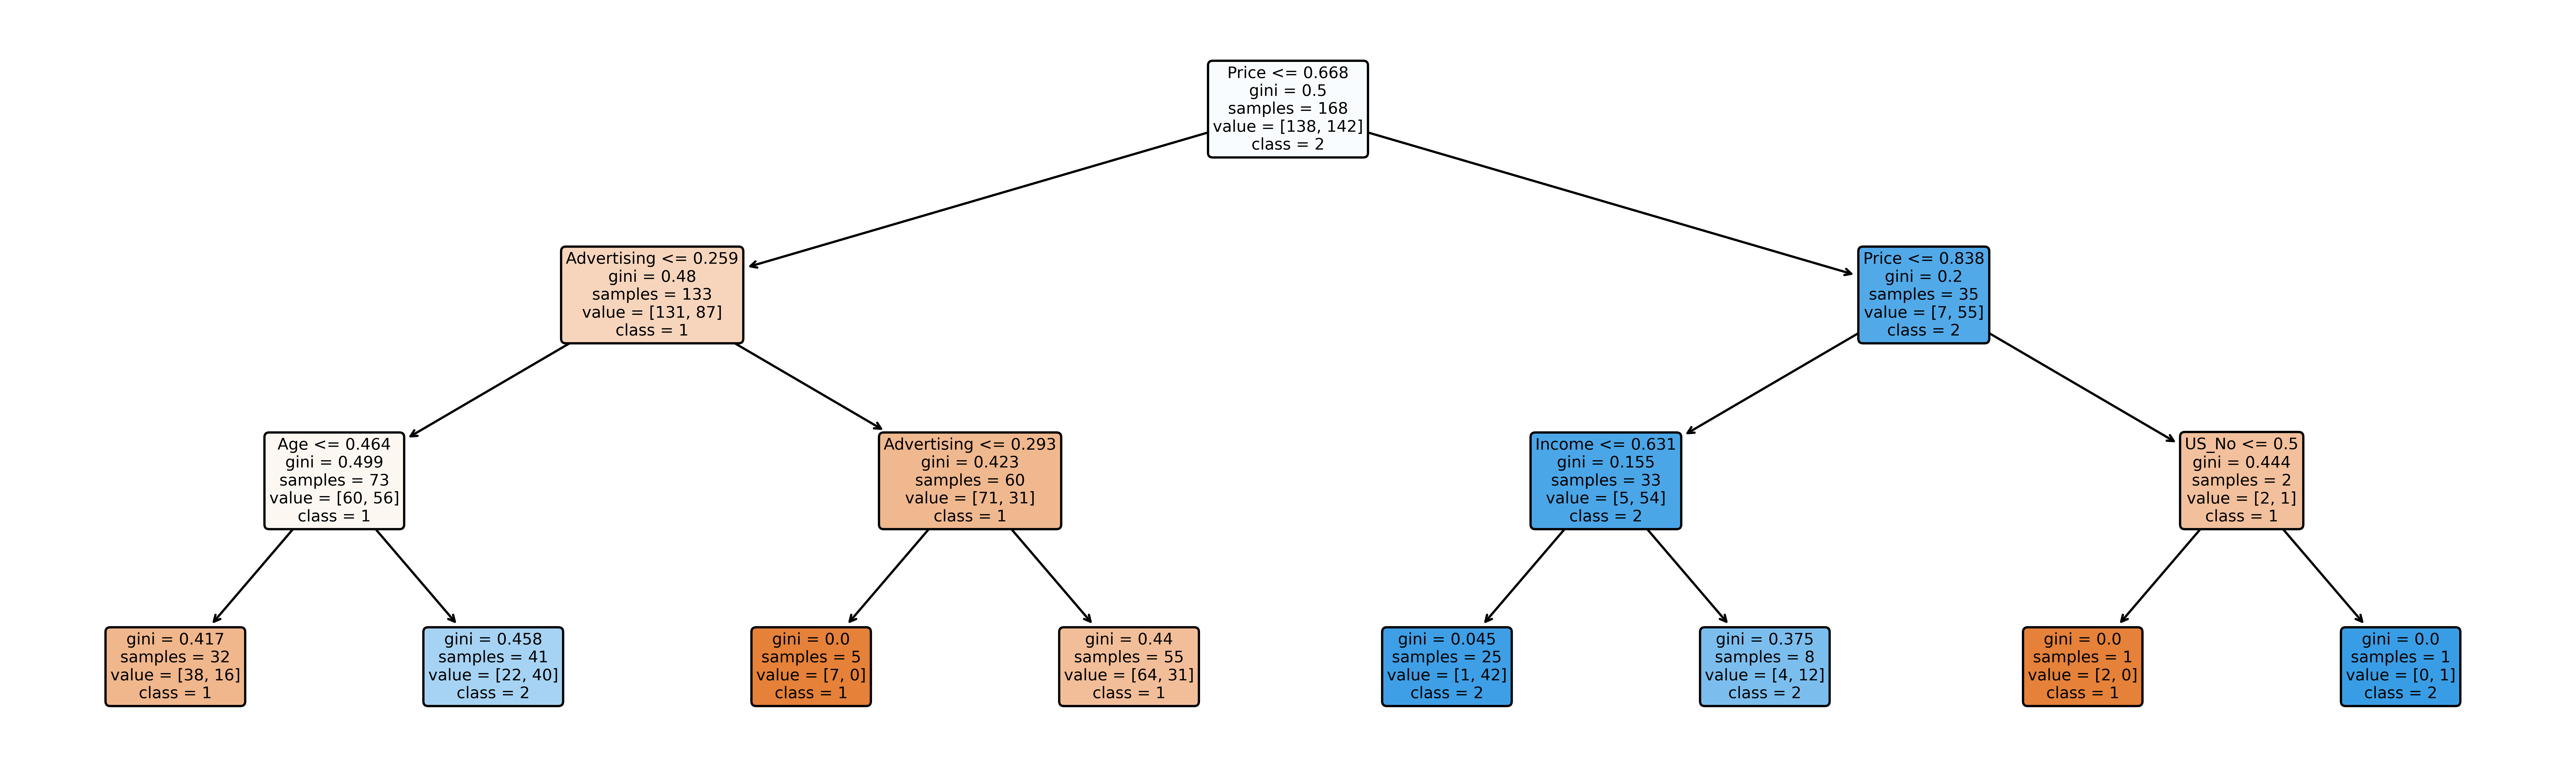

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=787846414)


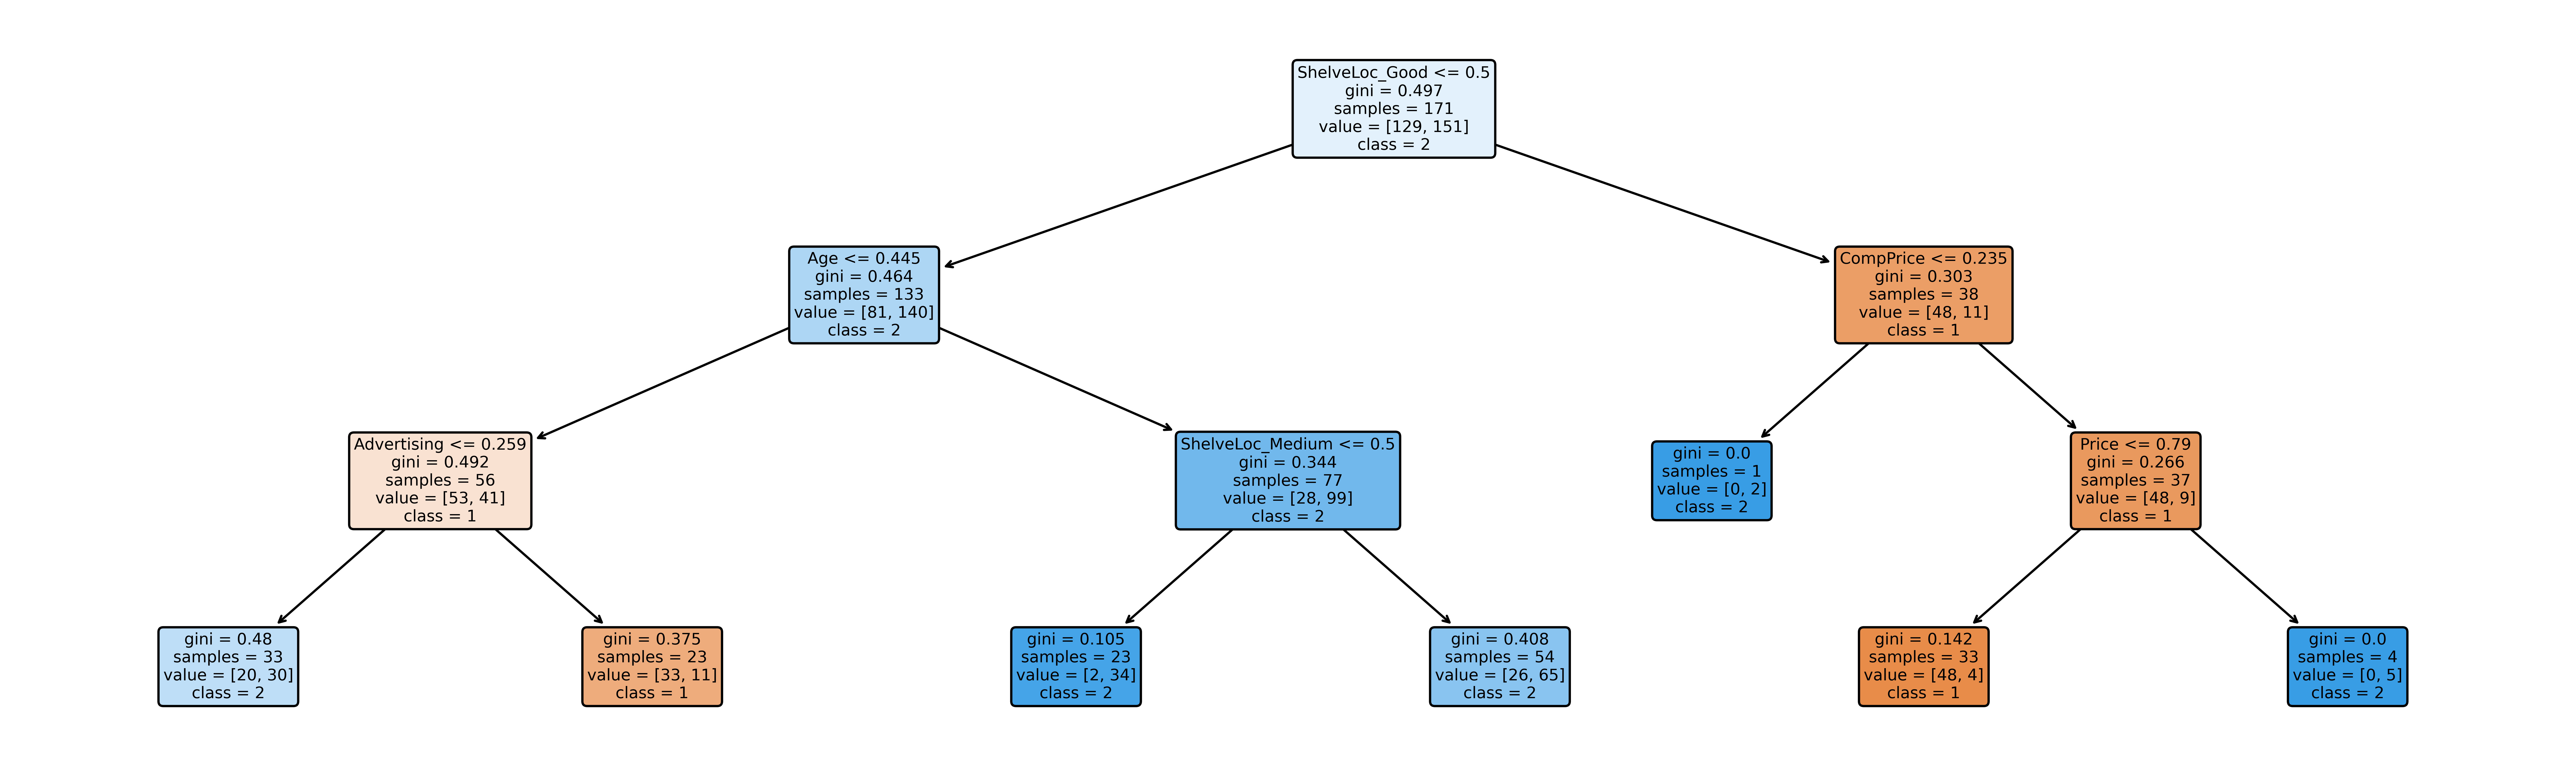

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=996406378)


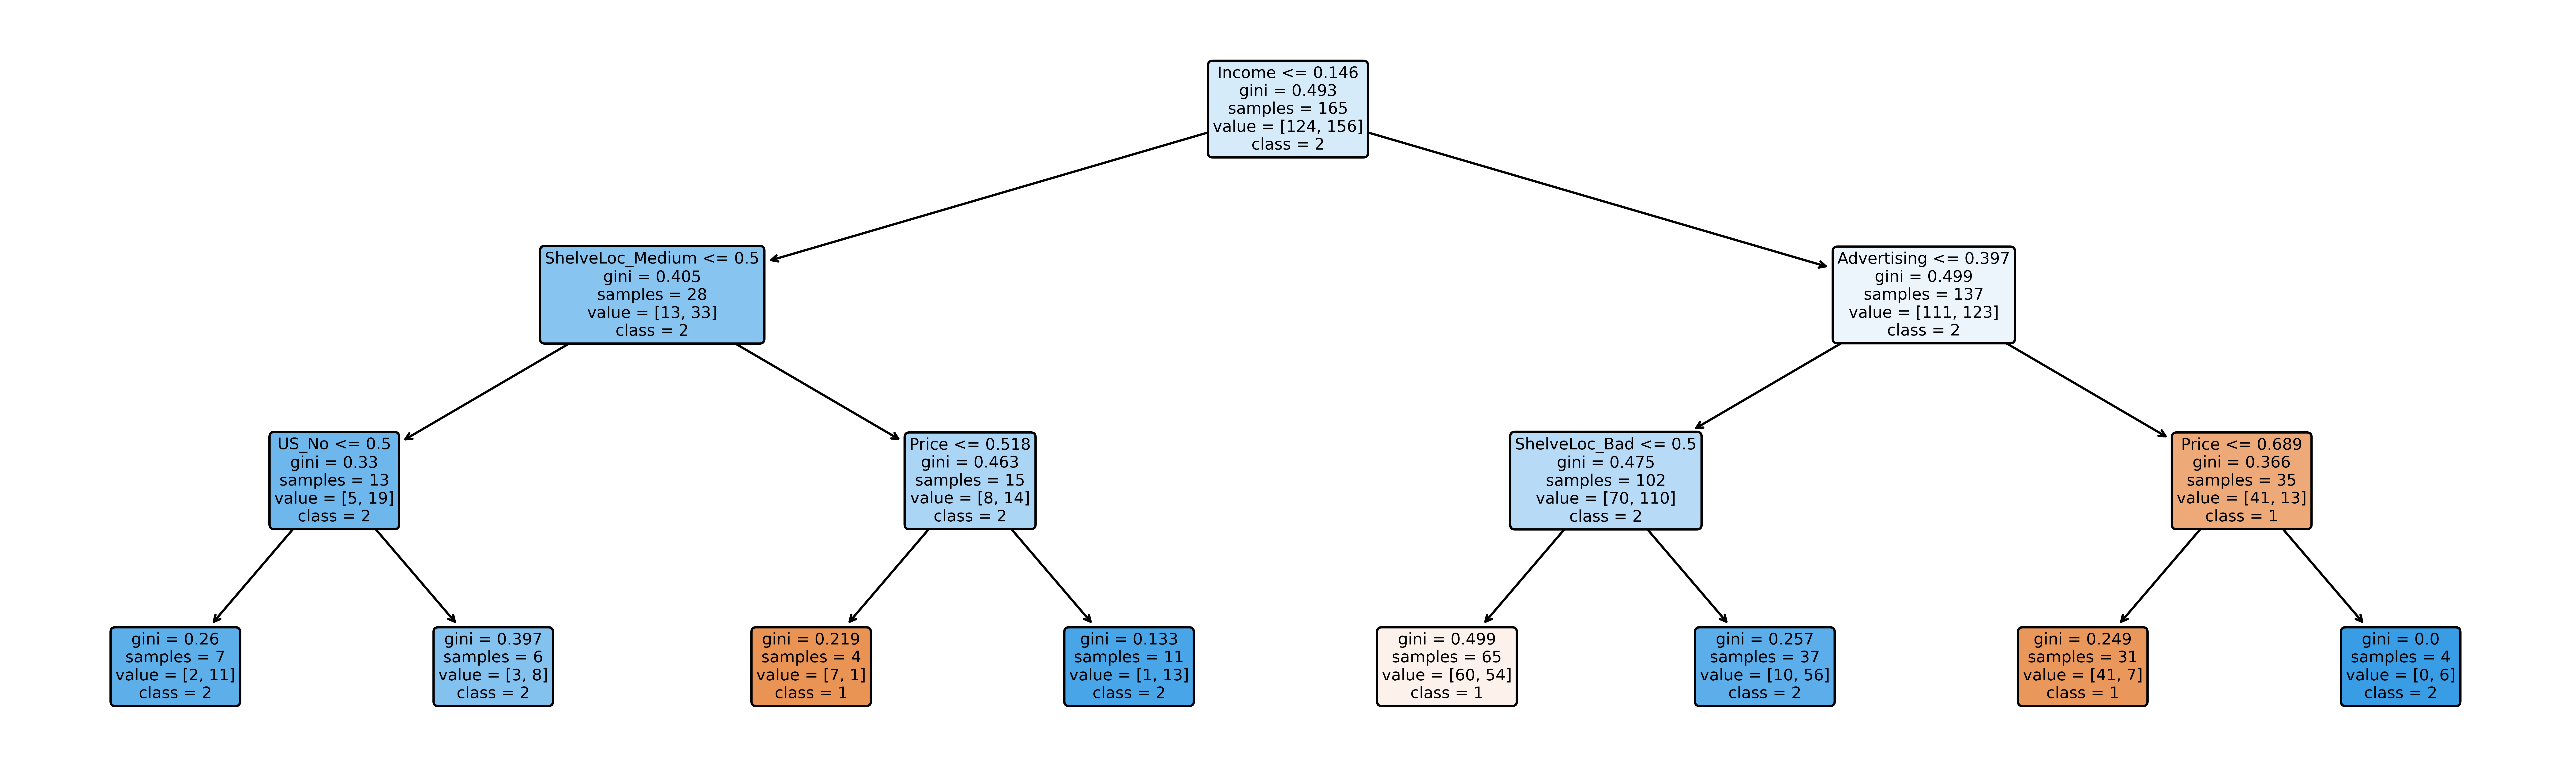

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1201263687)


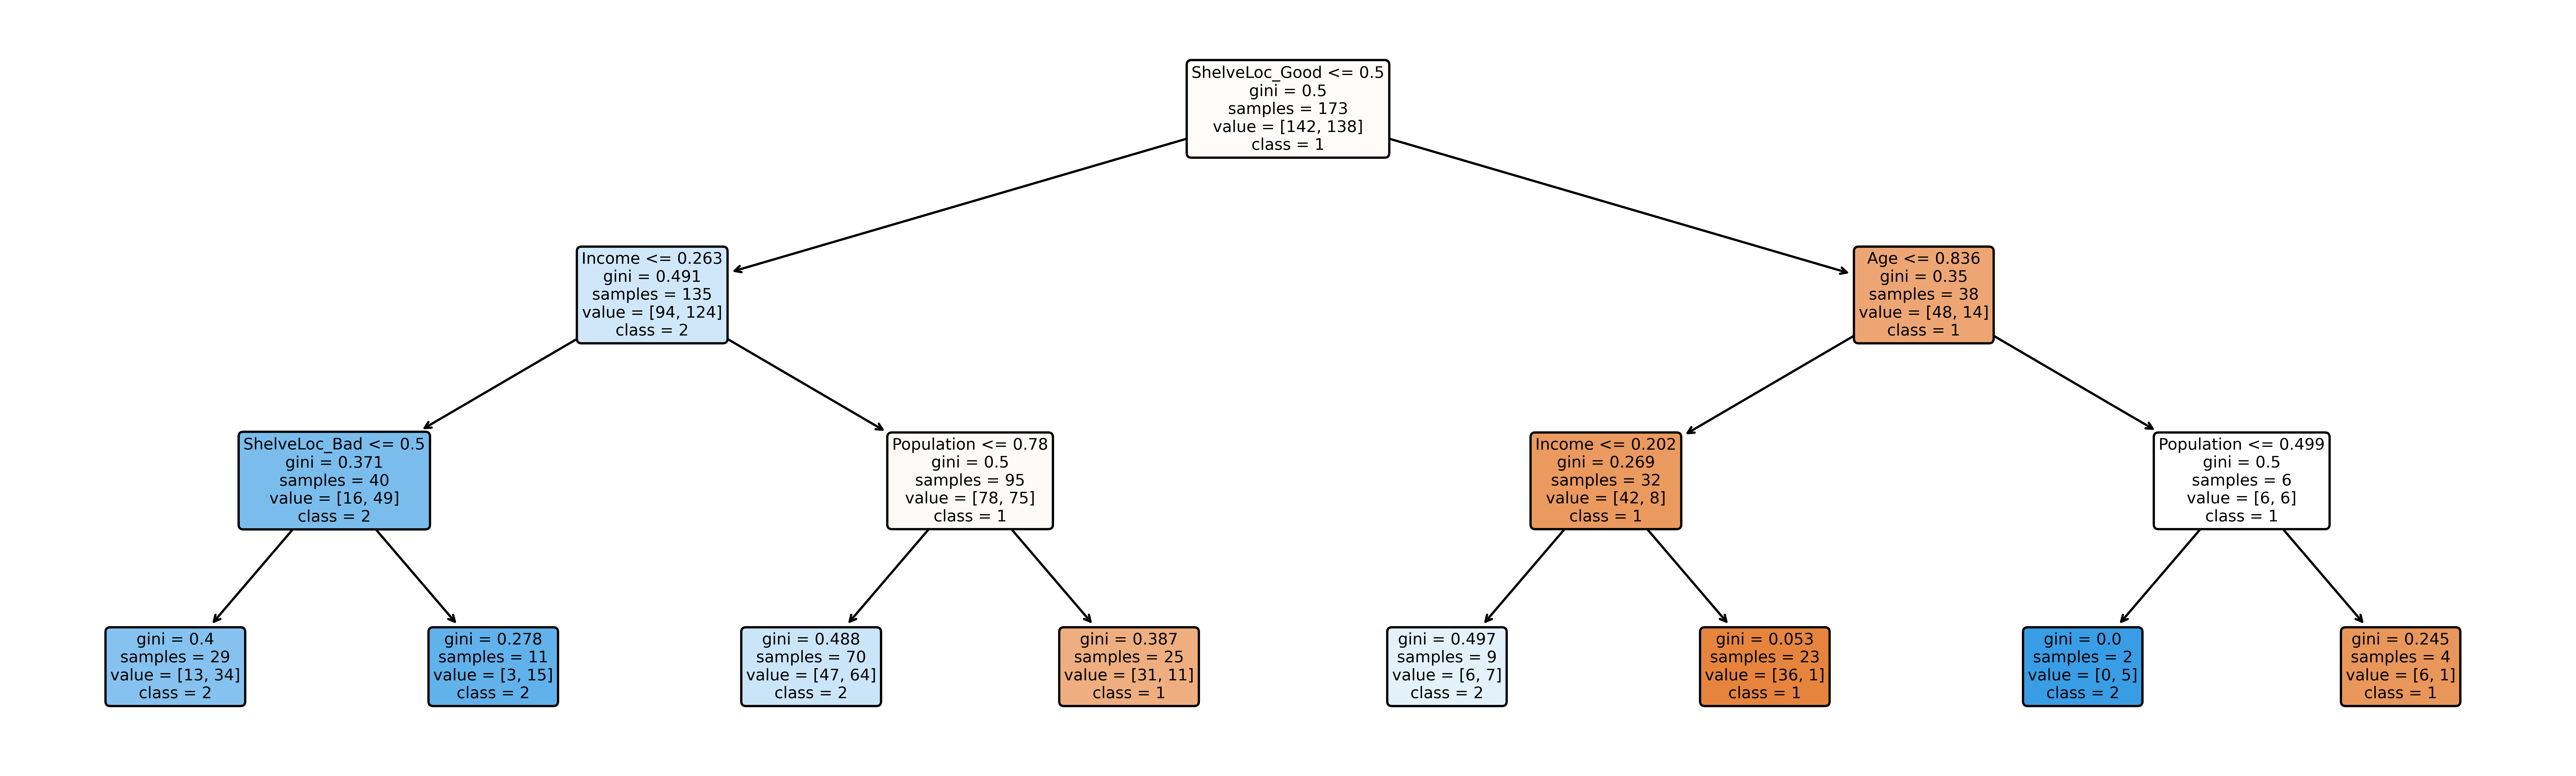

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=423734972)


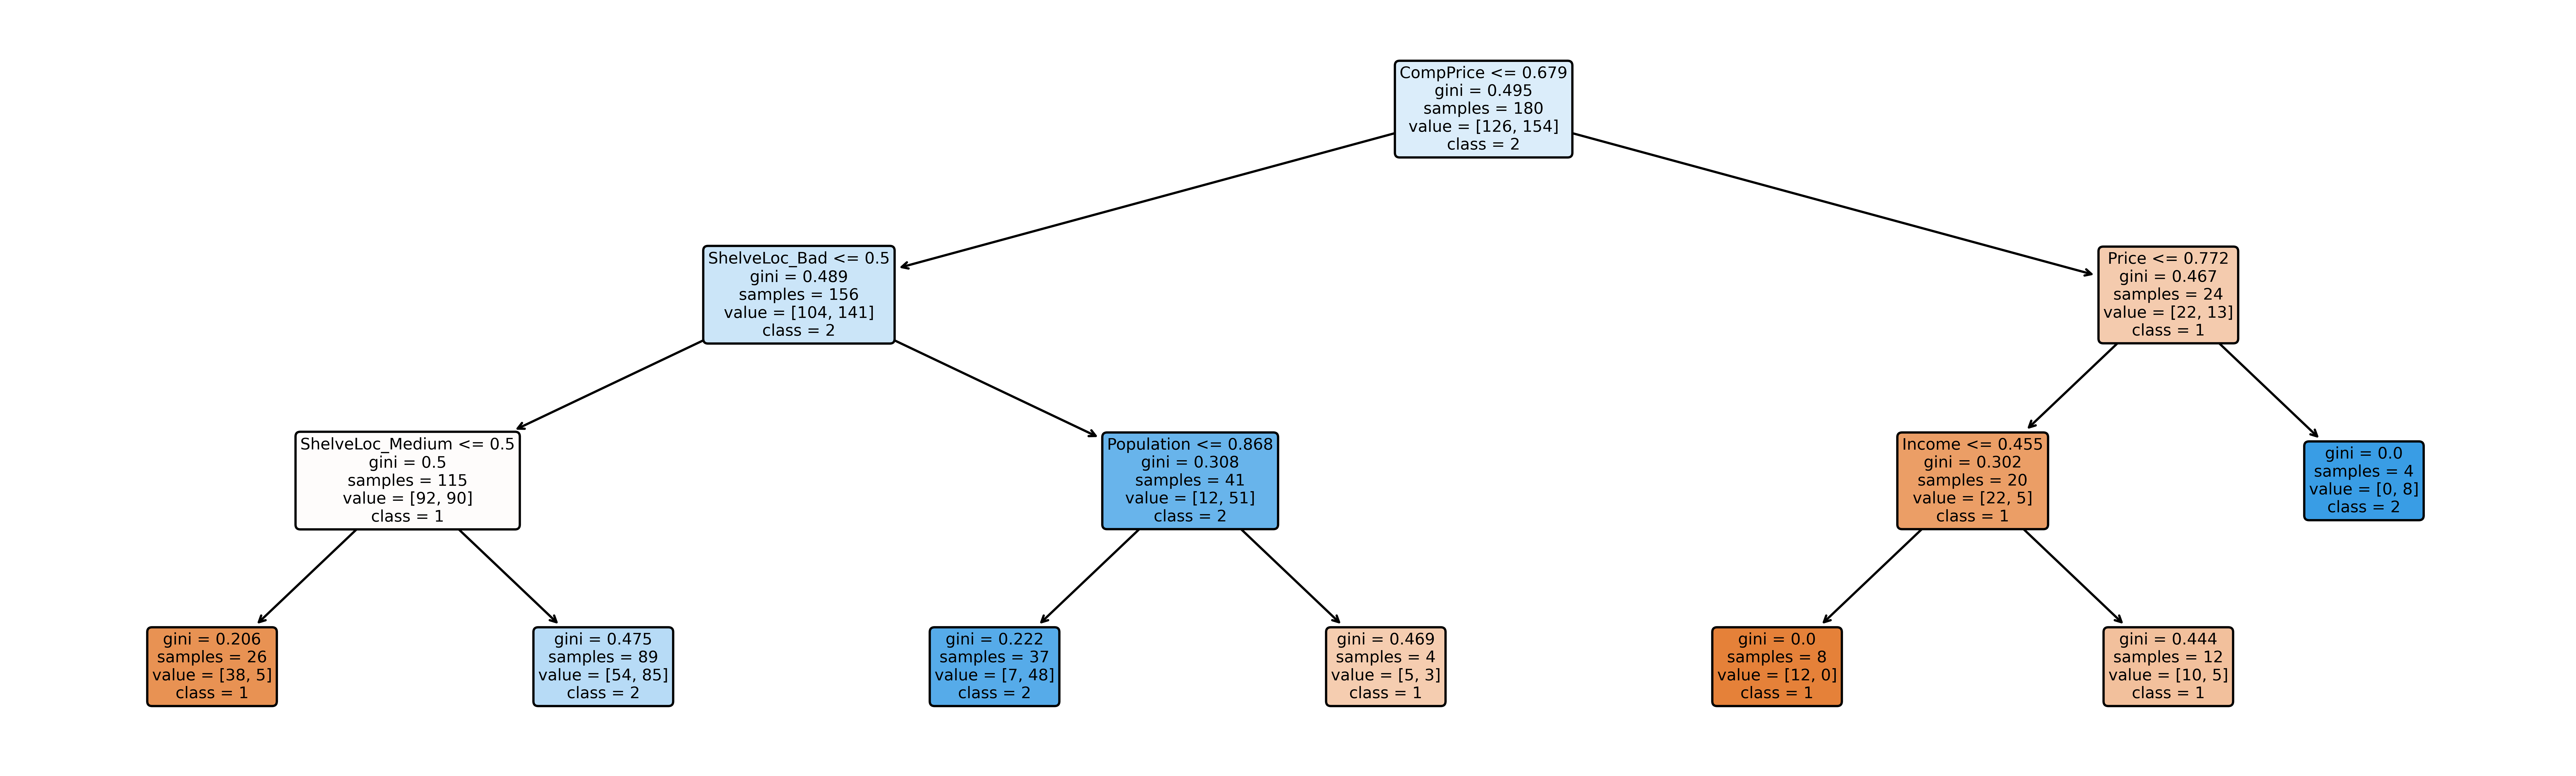

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=415968276)


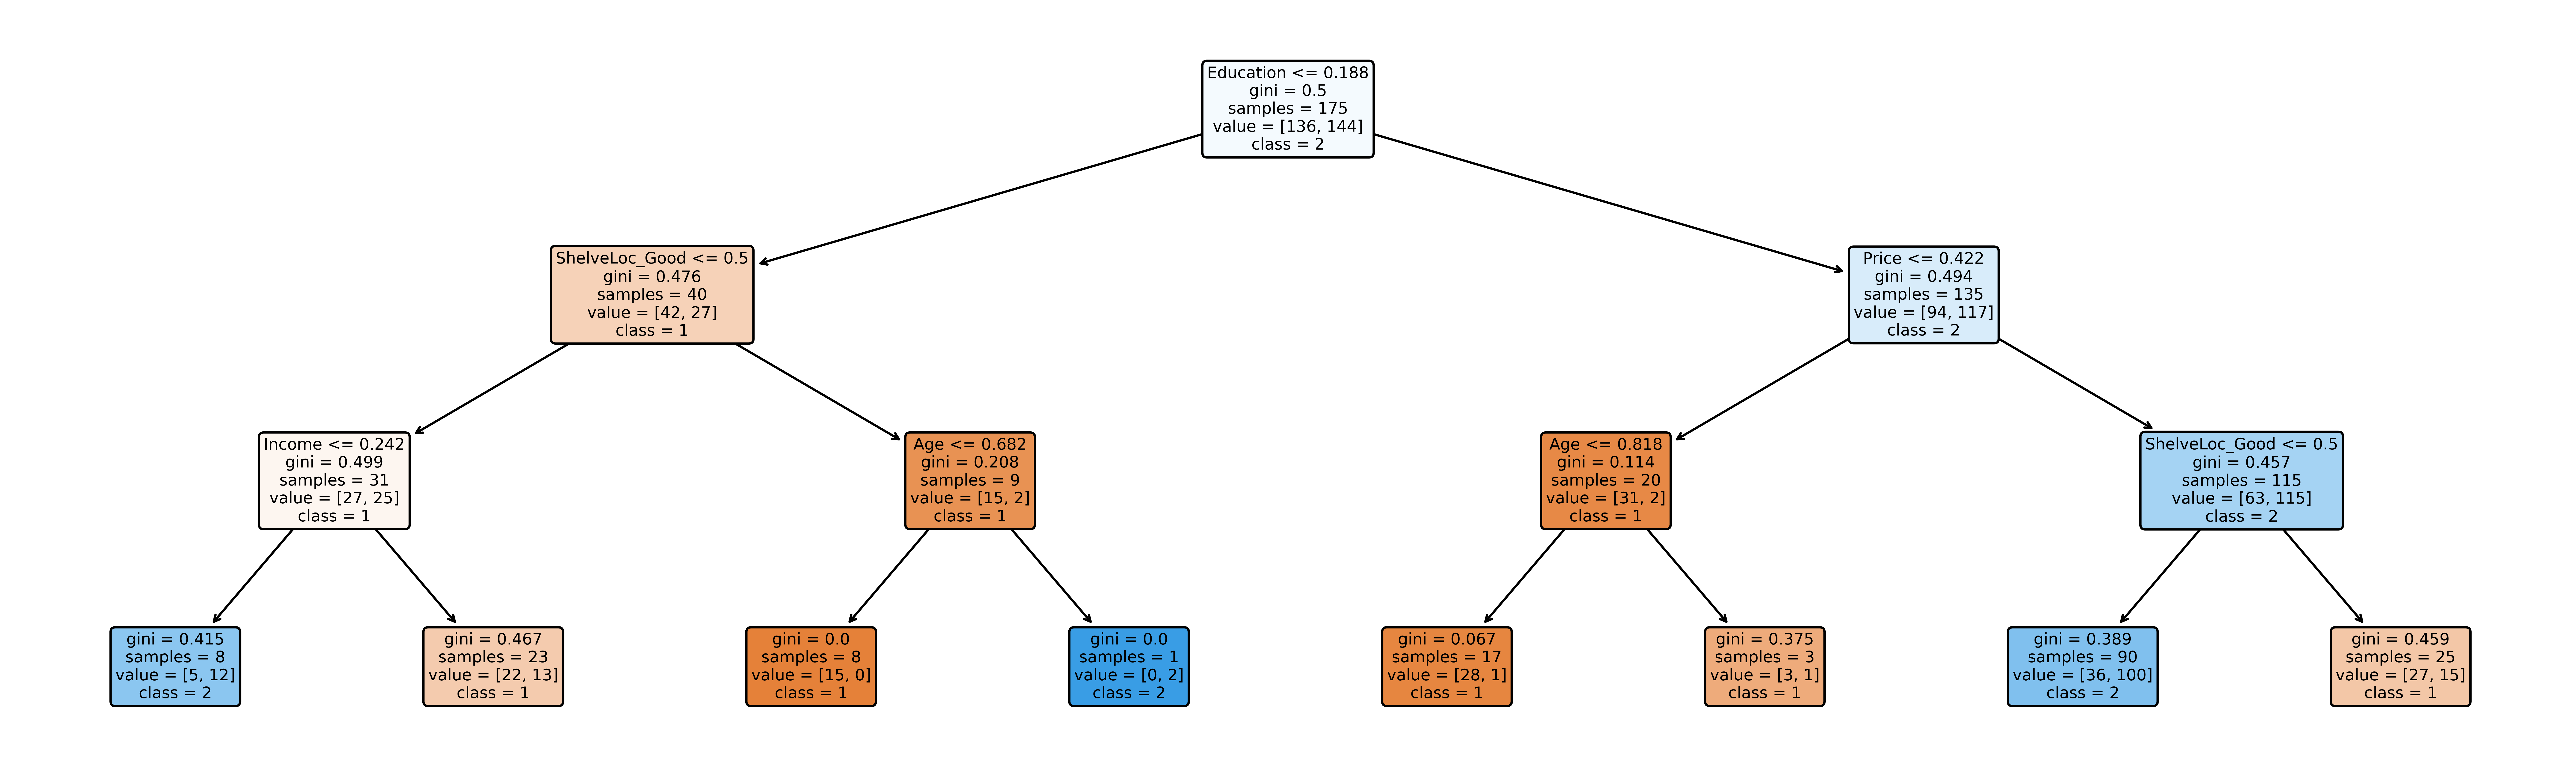

In [21]:
features = Columns.values # The name of each column
classes = ['1', '2'] # The name of each class
# You can also use low, medium and high risks in the same order instead
# classes = ['low risk','high risk']

for estimator in model.estimators_:
    print(estimator)
    plt.figure(figsize=(20,6),dpi=700)
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=7, 
                   filled=True, 
                   rounded=True,
                   )
    plt.show()

In [22]:
# Making predictions
Y_pred = model.predict(X_test)
pd.Series(Y_pred).value_counts()

1.0    68
0.0    52
dtype: int64

## Model Evaluation

In [23]:
#training and test scores
print('Training set score: {:.4f}'.format(model.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, Y_test)))

Training set score: 0.8250
Test set score: 0.7750


              precision    recall  f1-score   support

         0.0       0.87      0.69      0.77        65
         1.0       0.71      0.87      0.78        55

    accuracy                           0.78       120
   macro avg       0.79      0.78      0.77       120
weighted avg       0.79      0.78      0.77       120



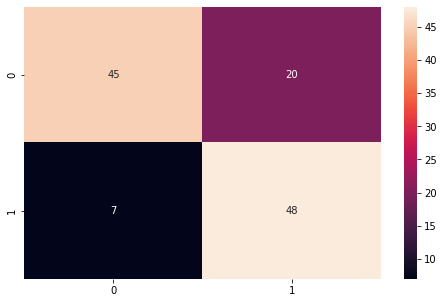

In [24]:
# confusion matrix and classification report
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize = (8,5))
sns.heatmap(cm, annot=True, fmt='d')

print(classification_report(Y_test,Y_pred))

In [25]:
# Accuracy score
print("Accuracy_score", accuracy_score(Y_test,Y_pred)*100)

Accuracy_score 77.5




 ROC AUC score: 0.7825174825174824 




Text(0, 0.5, 'True Positive Rate')

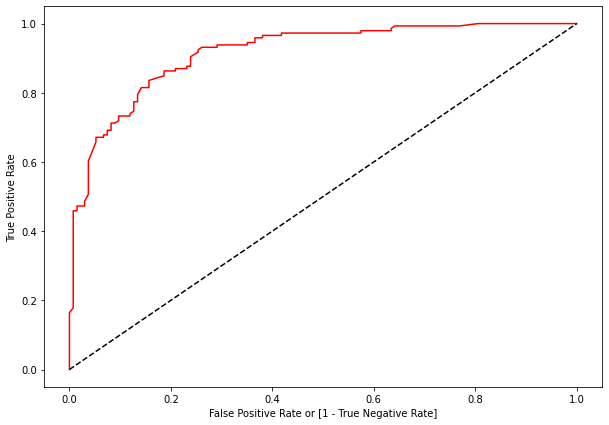

In [26]:
# AUC and ROC
fpr, tpr, thresholds = roc_curve(Y_train, model.predict_proba (X_train)[:,1])

auc = roc_auc_score(Y_test, Y_pred)

plt.figure(figsize= (10,7))

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')

print(f'\n\n ROC AUC score: {auc} \n\n')
plt.ylabel('True Positive Rate')